# Problem Statement:-
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information: For more information, read [Cho et al, 2020].

station - used weather station number: 1 to 25

Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

lat - Latitude (Â°): 37.456 to 37.645

lon - Longitude (Â°): 126.826 to 127.135

DEM - Elevation (m): 12.4 to 212.3

Slope - Slope (Â°): 0.1 to 5.2

Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.shape

(7752, 25)

There are 7752 rows and 25 columns present in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


There are some null values present in the dataset

In [7]:
df.duplicated().sum()

0

There are no duplicate values present in the dataset.

<AxesSubplot:>

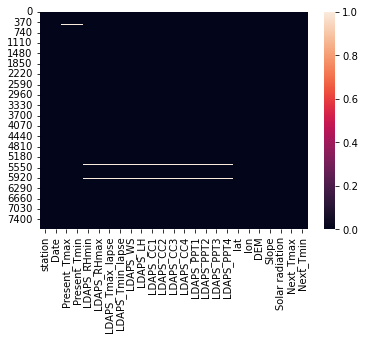

In [8]:
sns.heatmap(df.isna())

We can observe that the null values are present in some of the rows only, and the overall volume of null values is very less compared to the dataset. So, it will be better to remove the null values instead of filling them.

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(7588, 25)

Now there are total of 7588 rows and 25 columns.

In [11]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


There might be some skewness present in the dataset, but it will not be much as there is not a lot of difference between the mean values and median(50%) values.

There can be outliers present in the dataset.

In [12]:
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7588 non-null   float64       
 1   Date              7588 non-null   datetime64[ns]
 2   Present_Tmax      7588 non-null   float64       
 3   Present_Tmin      7588 non-null   float64       
 4   LDAPS_RHmin       7588 non-null   float64       
 5   LDAPS_RHmax       7588 non-null   float64       
 6   LDAPS_Tmax_lapse  7588 non-null   float64       
 7   LDAPS_Tmin_lapse  7588 non-null   float64       
 8   LDAPS_WS          7588 non-null   float64       
 9   LDAPS_LH          7588 non-null   float64       
 10  LDAPS_CC1         7588 non-null   float64       
 11  LDAPS_CC2         7588 non-null   float64       
 12  LDAPS_CC3         7588 non-null   float64       
 13  LDAPS_CC4         7588 non-null   float64       
 14  LDAPS_PPT1        7588 n

We have converted the 'Date' column to datetime format. 

All the other columns have float type data in them.

In [14]:
df['month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day
df['year']=pd.DatetimeIndex(df['Date']).year

In [15]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,day,year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,30,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,30,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,30,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,30,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,30,2013


In [16]:
df.drop(columns=['Date'],inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64


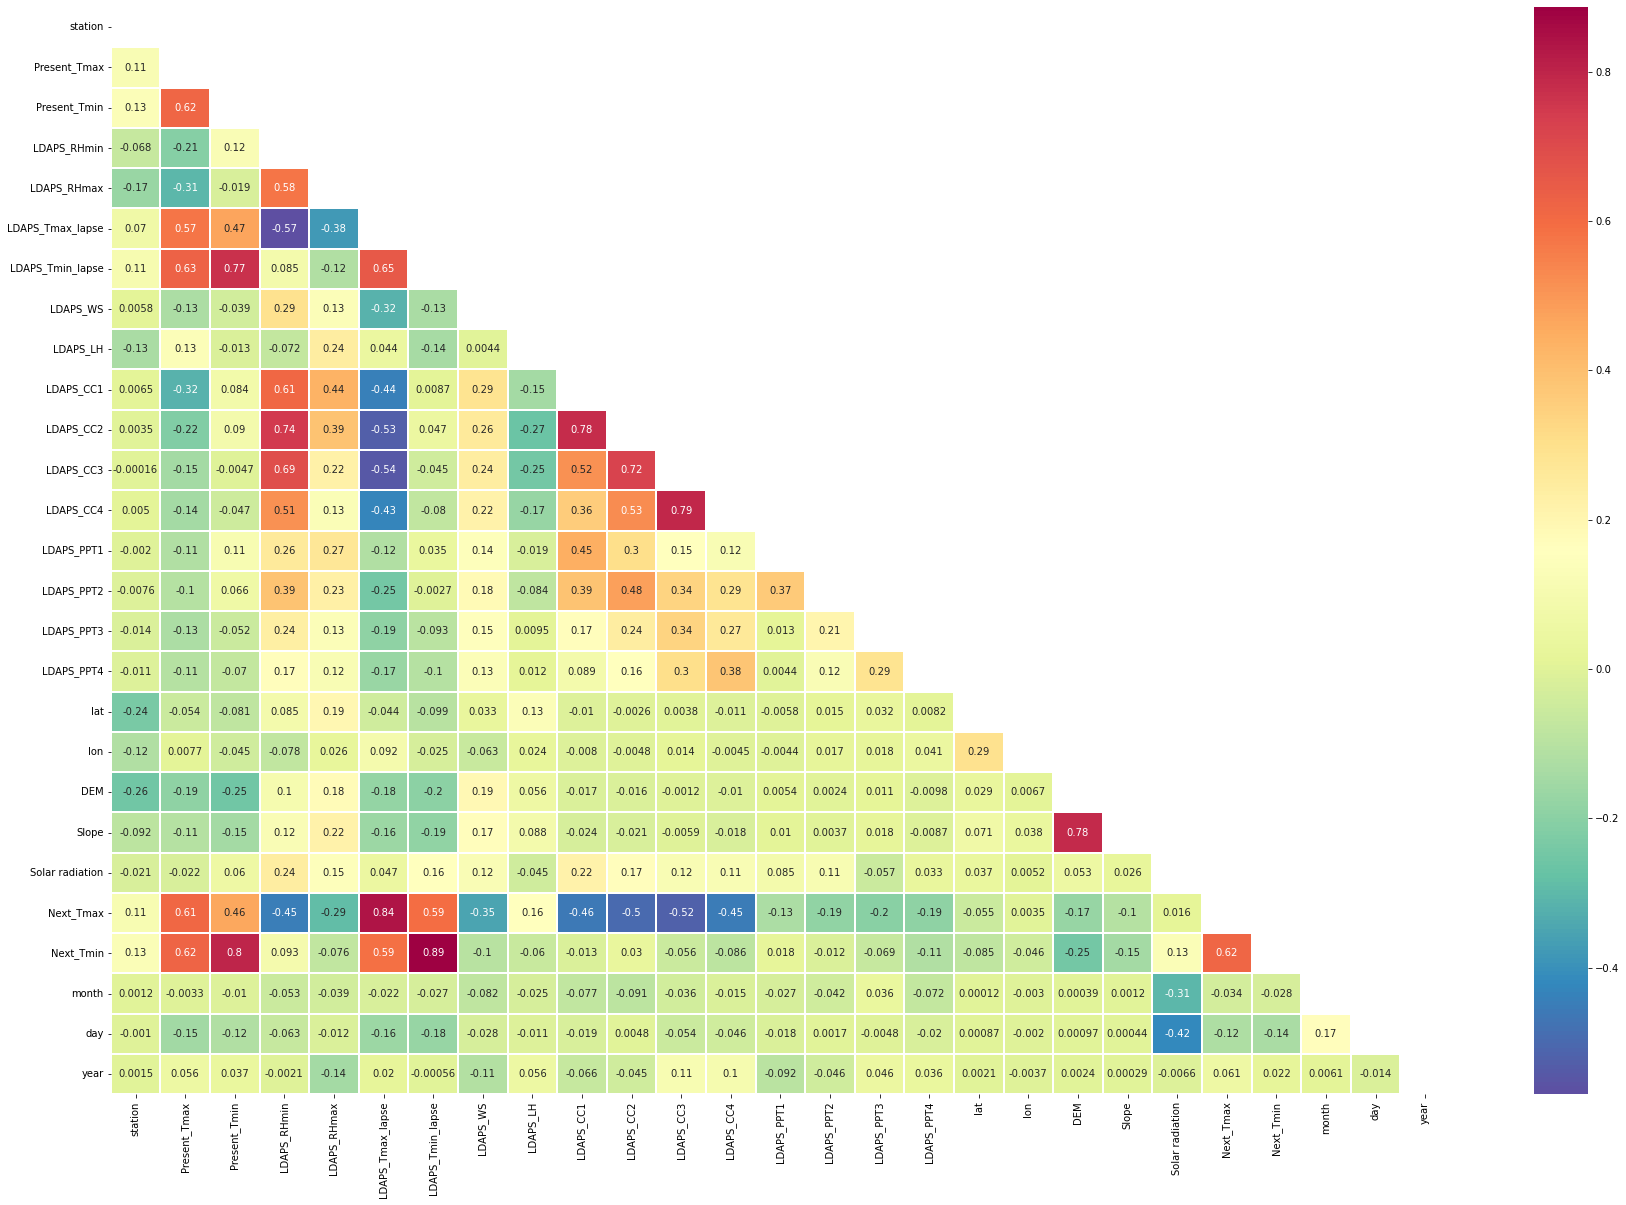

In [18]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,mask=np.triu(df.corr()),linewidths=0.1,cmap='Spectral_r')
plt.show()

# Data Visualisation

Text(0, 0.5, 'Present_Tmax')

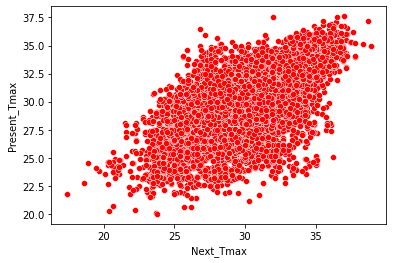

In [19]:
sns.scatterplot(df['Next_Tmax'],df['Present_Tmax'],color='red')
plt.xlabel('Next_Tmax')
plt.ylabel('Present_Tmax')

Text(0, 0.5, 'LDAPS_Tmax_lapse')

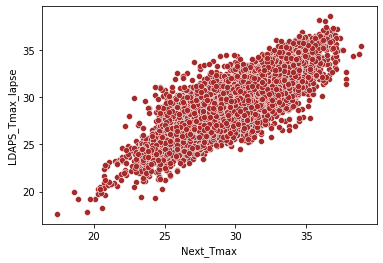

In [20]:
sns.scatterplot(df['Next_Tmax'],df['LDAPS_Tmax_lapse'],color='brown')
plt.xlabel('Next_Tmax')
plt.ylabel('LDAPS_Tmax_lapse')

In [21]:
f = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 
                   'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 
                   'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation', 'day','month','year' ]
l = ['Next_Tmax', 'Next_Tmin']

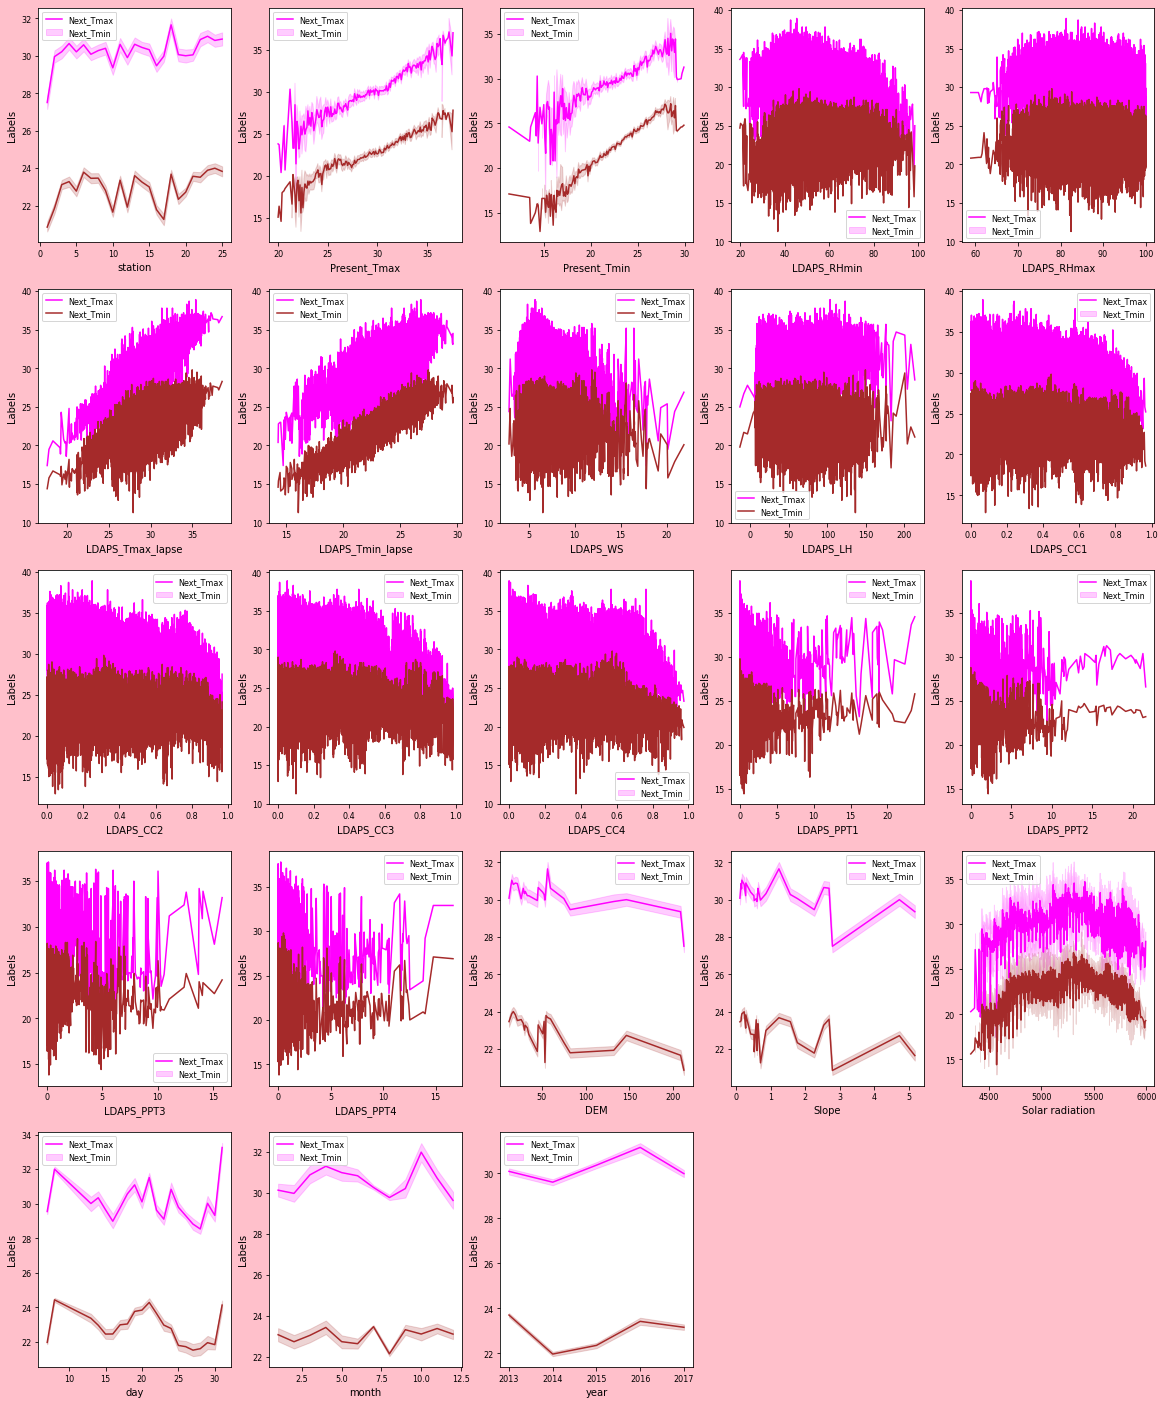

In [22]:
plt.figure(figsize=(20,25),facecolor='pink')
pn=1
for c in df[f]:
    if pn<=24:
        ax=plt.subplot(5,5,pn)
        sns.lineplot(x=df[c], y=l[0],color='magenta' ,data=df)
        sns.lineplot(x=df[c], y=l[1],color='brown', data=df)
        plt.ylabel("Labels")
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.legend(['Next_Tmax', 'Next_Tmin'], fontsize=8)
    pn+=1

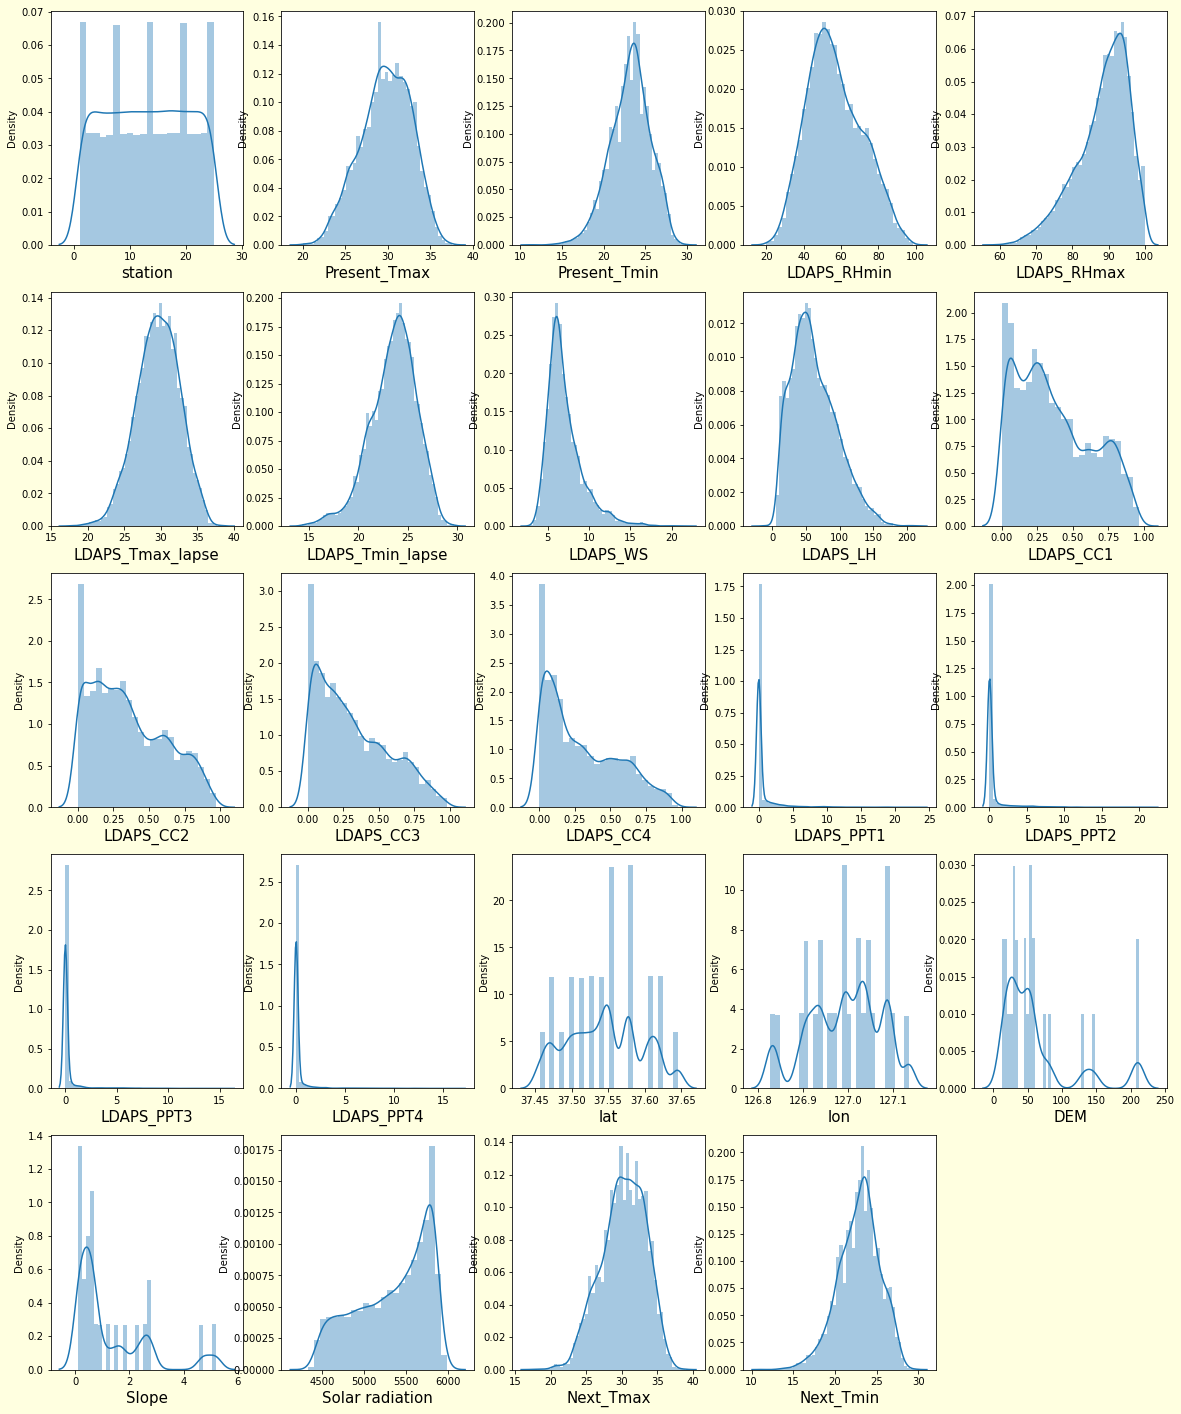

In [23]:
plt.figure(figsize=(20,25),facecolor='lightyellow')
pltno=1

for c in df:
    if pltno<=24:
        ax=plt.subplot(5,5,pltno)
        sns.distplot(df[c])
        plt.xlabel(c,fontsize=15)
        
    pltno+=1

In [24]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
month              -0.703092
day                 0.245563
year                0.013575
dtype: float64

There is skewness present in some of the dataset

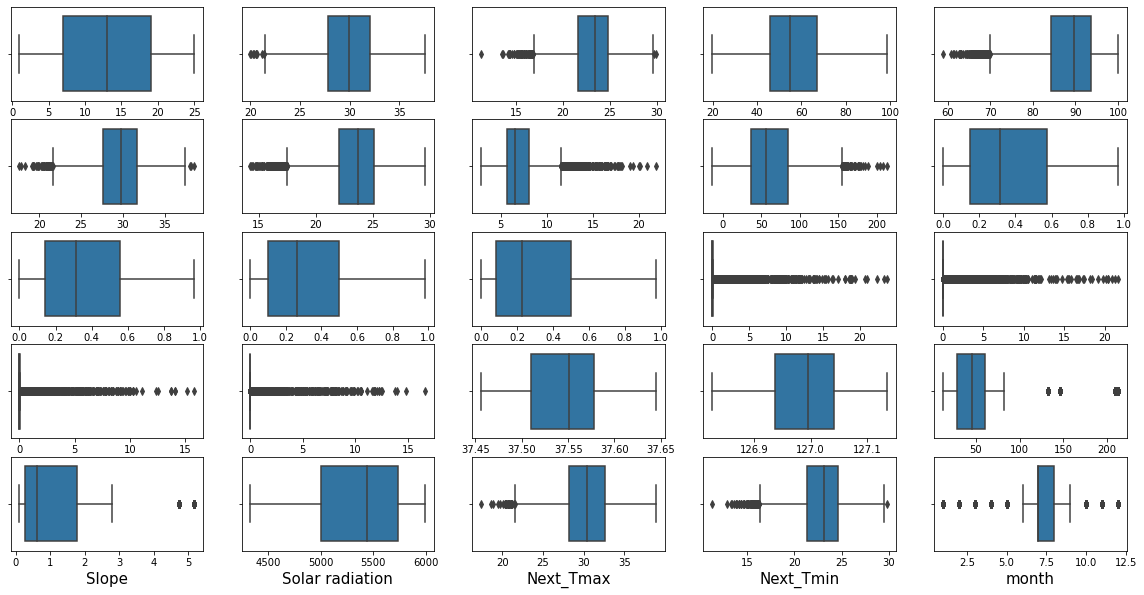

In [25]:
plt.figure(figsize=(20,10),facecolor='w')
pn=1
for c in df:
    if pn<=25:
        ax=plt.subplot(5,5,pn)
        sns.boxplot(df[c])
        plt.xlabel(c,fontsize=15)
    pn+=1

There are outliers present in the dataset, let's remove them

In [26]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))

z.shape

(7588, 27)

In [27]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [28]:
 df1=df[(z<3).all(axis=1)]
df1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,day,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,30,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,30,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,30,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,30,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,30,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,8,30,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,8,30,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,8,30,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,8,30,2017


In [29]:
df1.shape

(6739, 27)

In [30]:
df.shape

(7588, 27)

In [31]:
# Data loss

(7588-6739)/7588*100

11.188719030047443

##### data loss is just above 10% , and considering the dataset having lot of rows and columns, we can afford 11.18% of data loss

In [32]:
df1.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
month              -0.680725
day                 0.256528
year                0.025066
dtype: float64

In [33]:
s=['LDAPS_RHmax','LDAPS_WS','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','month']

In [34]:
from sklearn.preprocessing import PowerTransformer
yj = PowerTransformer(method = 'yeo-johnson')

In [35]:
df1[s] = yj.fit_transform(df1[s].values)

In [36]:
df1.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.007615
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
month               0.039744
day                 0.256528
year                0.025066
dtype: float64

The Data looks better than before.

# 1) Column 'Next_Tmin' as our target variable

In [37]:
x=df1.drop(columns=['Next_Tmin'])
y=df1['Next_Tmin']

# Standard scalling.

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[-1.67271855, -0.42570408, -0.81445954, ..., -0.57580996,
         1.67404544, -1.42147346],
       [-1.5339585 ,  0.69021541, -0.72778535, ..., -0.57580996,
         1.67404544, -1.42147346],
       [-1.39519845,  0.58559796,  0.00894523, ..., -0.57580996,
         1.67404544, -1.42147346],
       ...,
       [ 1.38000259, -2.30881822, -2.67795455, ...,  0.36410188,
         1.67404544,  1.44293849],
       [ 1.51876264, -2.30881822, -2.41793199, ...,  0.36410188,
         1.67404544,  1.44293849],
       [ 1.65752269, -2.3436907 , -2.54794327, ...,  0.36410188,
         1.67404544,  1.44293849]])

In [39]:
xx=pd.DataFrame(scaled_x,columns=x.columns)
xx

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,month,day,year
0,-1.672719,-0.425704,-0.814460,0.195915,0.348222,-0.662498,-0.289928,0.176871,0.225115,-0.440130,...,-0.414444,1.211166,0.002925,1.854393,1.327776,1.543068,-0.489951,-0.575810,1.674045,-1.421473
1,-1.533959,0.690215,-0.727785,-0.236604,0.261118,-0.016693,0.171379,-0.574617,-0.298746,-0.473686,...,-0.414444,1.211166,0.518733,0.069704,-0.375858,1.249502,-0.011135,-0.575810,1.674045,-1.421473
2,-1.395198,0.585598,0.008945,-0.494494,-0.717348,0.070769,0.409475,-0.252083,-1.236867,-0.537958,...,-0.414444,0.671467,0.845830,-0.353433,-0.944115,1.235827,0.194072,-0.575810,1.674045,-1.421473
3,-1.256438,0.725088,0.052282,0.194767,1.375094,-0.069787,-0.146681,-0.606795,0.113709,-0.510012,...,-0.414444,2.018714,0.392926,0.098766,1.249133,1.220170,0.399279,-0.575810,1.674045,-1.421473
4,-1.117678,0.515853,-0.597774,0.045667,0.186035,-0.284509,-0.074752,-0.541825,1.377075,-0.768323,...,-0.414444,0.133768,1.814542,-0.278815,-0.392364,1.226317,0.228274,-0.575810,1.674045,-1.421473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,1.102482,-2.378563,-2.374595,-2.226900,-1.363447,-0.757521,-2.400625,0.048293,-1.564654,-1.159992,...,-0.414444,0.133768,0.619378,-0.712912,-0.269357,-2.107693,-1.002969,0.364102,1.674045,1.442938
6735,1.241243,-2.587798,-2.547943,-1.836710,-0.753410,-1.160213,-2.620034,-0.516916,0.604824,-1.106080,...,-0.414444,-0.675779,1.198089,-0.999559,-1.353609,-2.141474,-0.866164,0.364102,1.674045,1.442938
6736,1.380003,-2.308818,-2.677955,-2.078766,-1.302260,-1.288468,-2.188536,-0.244791,0.303076,-1.250919,...,-0.414444,-0.136081,-1.255142,-1.576584,-1.278502,-2.137886,-0.763561,0.364102,1.674045,1.442938
6737,1.518763,-2.308818,-2.417932,-2.273699,-1.457152,-1.049238,-2.207453,0.011101,-0.439205,-1.227700,...,-0.414444,-0.405930,-1.028689,-1.397502,-1.069018,-2.149622,-0.660957,0.364102,1.674045,1.442938


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(xx.values,i)
                    for i in range(len(xx.columns))]
vif["features"]=xx.columns
vif

,Vif values,features
0,1.304880,station
1,2.957549,Present_Tmax
2,3.134539,Present_Tmin
3,6.073373,LDAPS_RHmin
4,2.558508,LDAPS_RHmax
5,8.302259,LDAPS_Tmax_lapse
6,6.929011,LDAPS_Tmin_lapse
7,1.211224,LDAPS_WS
8,1.592088,LDAPS_LH
9,4.876365,LDAPS_CC1


All columns have vif values under 10.

# Model Building

In [41]:
# importing thee necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

In [42]:
models_r=[LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),AdaBoostRegressor(),SVR()]


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [44]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    xtrain,xtest,ytrain,ytest = train_test_split(xx,y,test_size = .25, random_state=i)
    lg = LinearRegression()
    lg.fit(xtrain,ytrain)
    pred = lg.predict(xtest)
    acc = r2_score(ytest,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.8520258707875016 on Random State: 43


In [45]:
#Best random state is 43

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(xx,y,test_size=0.25,random_state=43)

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
for m in models_r:
    m.fit(xtrain,ytrain)
    mpred=m.predict(xtest)
    print('\033[1m','For',m,'\033[0m')
    print("R2 score :",r2_score(ytest, mpred))
    print("Mean absolute error: ", mean_absolute_error(ytest,mpred))
    print("Mean squared error: ", mean_squared_error(ytest,mpred))
    cvs=cross_val_score(m,xx,y)
    print('Cross Validation Score=',cvs.mean(),'\n')

 For LinearRegression() 
R2 score : 0.8520258707875016
Mean absolute error:  0.7309455409143939
Mean squared error:  0.8399157243321408
Cross Validation Score= 0.7886761387964515 

 For RandomForestRegressor() 
R2 score : 0.9126244821181003
Mean absolute error:  0.5364884272997033
Mean squared error:  0.49595204094955486
Cross Validation Score= 0.7927565726960009 

 For KNeighborsRegressor() 
R2 score : 0.8776434585245911
Mean absolute error:  0.6411157270029675
Mean squared error:  0.6945077744807123
Cross Validation Score= 0.5787662289269006 

 For DecisionTreeRegressor() 
R2 score : 0.8021732208487159
Mean absolute error:  0.7956083086053412
Mean squared error:  1.1228842729970328
Cross Validation Score= 0.6063636833722766 

 For AdaBoostRegressor() 
R2 score : 0.8181987500108343
Mean absolute error:  0.824987135931784
Mean squared error:  1.0319217918819918
Cross Validation Score= 0.7449717925841808 

 For SVR() 
R2 score : 0.9286053848477643
Mean absolute error:  0.489890308649541

In [49]:
# as per the above observation, Randomforest regressor model is our best model of the all.

# Hyperparameter tuning.

In [89]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators':[50,60,70],'max_depth': [10,15,20],
            'criterion':['friedman_mse', 'absolute_error', 'poisson', 'squared_error'],
             'min_samples_split':[5,10,15,20],
             'max_features':["sqrt","log2"]}
gcs=GridSearchCV(RandomForestRegressor(),param,cv=5)
gcs.fit(xtrain,ytrain)
gcs.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 70}

In [50]:
fmodel=RandomForestRegressor(max_features='sqrt',criterion='friedman_mse',min_samples_split=5,max_depth=20,n_estimators=70)
fmodel.fit(xtrain,ytrain)
pred=fmodel.predict(xtest)
acc=r2_score(ytest,pred)
print(acc*100)

91.64069086443307


# Best fit line

Text(0.5, 1.0, 'Best Fit Line')

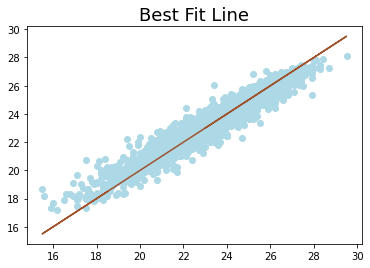

In [51]:
plt.scatter(x=ytest,y=pred,color='lightblue')
plt.plot(ytest,ytest,color='sienna')
plt.title('Best Fit Line',fontsize=18)

In [52]:
d=pd.DataFrame({'predicted values':pred,'actual values':ytest})

In [53]:
d

,predicted values,actual values
5006,23.647863,23.0
947,25.227215,25.6
3726,23.075553,23.0
715,23.062716,22.1
4242,23.547509,24.0
...,...,...
7073,26.704943,26.9
5959,24.038260,23.4
4402,23.157771,23.3
7354,20.646488,20.3


# Saving the model

In [54]:
import joblib
joblib.dump(fmodel,'Temp_Pred_Next_Tmin')

['Temp_Pred_Next_Tmin']

# Loading the  model

In [55]:
p = joblib.load("Temp_Pred_Next_Tmin")
print(p.predict(xtest))

[23.64786296 25.22721485 23.07555276 ... 23.15777111 20.6464879
 20.2114983 ]


# 2) Column 'Next_Tmax' as our target variable

In [56]:
x=df1.drop(columns=['Next_Tmax'])
y=df1['Next_Tmax']

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[-1.67271855, -0.42570408, -0.81445954, ..., -0.57580996,
         1.67404544, -1.42147346],
       [-1.5339585 ,  0.69021541, -0.72778535, ..., -0.57580996,
         1.67404544, -1.42147346],
       [-1.39519845,  0.58559796,  0.00894523, ..., -0.57580996,
         1.67404544, -1.42147346],
       ...,
       [ 1.38000259, -2.30881822, -2.67795455, ...,  0.36410188,
         1.67404544,  1.44293849],
       [ 1.51876264, -2.30881822, -2.41793199, ...,  0.36410188,
         1.67404544,  1.44293849],
       [ 1.65752269, -2.3436907 , -2.54794327, ...,  0.36410188,
         1.67404544,  1.44293849]])

In [58]:
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 6739, dtype: float64

In [59]:
scaled_x

array([[-1.67271855, -0.42570408, -0.81445954, ..., -0.57580996,
         1.67404544, -1.42147346],
       [-1.5339585 ,  0.69021541, -0.72778535, ..., -0.57580996,
         1.67404544, -1.42147346],
       [-1.39519845,  0.58559796,  0.00894523, ..., -0.57580996,
         1.67404544, -1.42147346],
       ...,
       [ 1.38000259, -2.30881822, -2.67795455, ...,  0.36410188,
         1.67404544,  1.44293849],
       [ 1.51876264, -2.30881822, -2.41793199, ...,  0.36410188,
         1.67404544,  1.44293849],
       [ 1.65752269, -2.3436907 , -2.54794327, ...,  0.36410188,
         1.67404544,  1.44293849]])

In [60]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .25, random_state=i)
    lg = LinearRegression()
    lg.fit(x_train,y_train)
    pred = lg.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.8034015137999319 on Random State: 43


In [61]:
# best random state is 43

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(scaled_x,y,test_size=0.25,random_state=43)

In [63]:
for m in models_r:
    m.fit(xtrain,ytrain)
    mpred=m.predict(xtest)
    print('\033[1m','For',m,'\033[0m')
    print("R2 score :",r2_score(ytest, mpred))
    print("Mean absolute error: ", mean_absolute_error(ytest,mpred))
    print("Mean squared error: ", mean_squared_error(ytest,mpred))
    cvs=cross_val_score(m,scaled_x,y)
    print('Cross Validation Score=',cvs.mean(),'\n')

 For LinearRegression() 
R2 score : 0.8034015137999319
Mean absolute error:  1.0067505130072896
Mean squared error:  1.744598755893329
Cross Validation Score= 0.6862924643751876 

 For RandomForestRegressor() 
R2 score : 0.9056309741983535
Mean absolute error:  0.6881323442136494
Mean squared error:  0.8374229537091976
Cross Validation Score= 0.6866449859433537 

 For KNeighborsRegressor() 
R2 score : 0.8894932916053037
Mean absolute error:  0.7657566765578636
Mean squared error:  0.9806274183976263
Cross Validation Score= 0.5249555446165652 

 For DecisionTreeRegressor() 
R2 score : 0.7882668992865531
Mean absolute error:  0.9765578635014837
Mean squared error:  1.8789020771513354
Cross Validation Score= 0.4269384303179799 

 For AdaBoostRegressor() 
R2 score : 0.762758680038595
Mean absolute error:  1.1763571950074354
Mean squared error:  2.1052599114622006
Cross Validation Score= 0.6507765198663956 

 For SVR() 
R2 score : 0.8929692101840373
Mean absolute error:  0.7115912318757114


In [64]:
# Randomforest regressor is our best model.

# Hyperparameter tuning

In [118]:
r=RandomForestRegressor()

from sklearn.model_selection import GridSearchCV
param = {'n_estimators':[50,60,70],'max_depth': [10,15,20],
            'criterion':['mse','mae'],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}
gcs=GridSearchCV(r,param,cv=5)
gcs.fit(xtrain,ytrain)
gcs.best_params_


{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 70}

In [65]:
fmodel2=RandomForestRegressor(max_features='sqrt',criterion='mse',min_samples_split=5,max_depth=20,n_estimators=70)
fmodel2.fit(xtrain,ytrain)
pred2=fmodel2.predict(xtest)
acc=r2_score(ytest,pred2)
print(acc*100)

91.45225454592007


In [66]:
d=pd.DataFrame({'predicted values':pred2,'actual values':ytest})

In [67]:
d

,predicted values,actual values
5006,29.049924,28.6
947,32.849474,33.4
3726,29.974235,29.8
715,29.390074,29.3
4242,32.311799,33.0
...,...,...
7073,34.927837,35.1
5959,33.526898,33.9
4402,30.698564,29.5
7354,26.592697,26.3


# Saving the model

In [68]:
import joblib
joblib.dump(fmodel2,'Temp_Pred_Next_Tmax')

['Temp_Pred_Next_Tmax']

# Loading the model

In [69]:
p = joblib.load("Temp_Pred_Next_Tmax")
pp=p.predict(xtest)
print(p.predict(xtest))

[29.04992372 32.84947449 29.97423469 ... 30.69856432 26.59269671
 29.82619414]


# Best fit line

Text(0.5, 1.0, 'Best Fit Line')

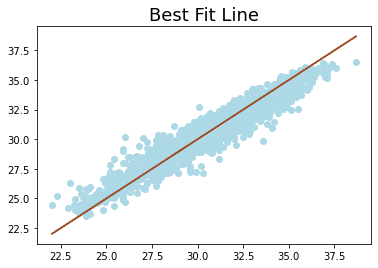

In [70]:
plt.scatter(x=ytest,y=pp,color='lightblue')
plt.plot(ytest,ytest,color='sienna')
plt.title('Best Fit Line',fontsize=18)